In [75]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

from moepy import lowess, eda

bounds = np.load("../dataset/edh_boundaries.npy")
transients = np.load("../dataset/transients_interp.npy")
set_num = 0

tr1 = np.array_split(transients[set_num, :], 31)
for i, arr in enumerate(tr1):
    tr1[i] = np.mean(arr)
tr1 = np.array(tr1)
bd1 = np.array(range(0, np.max(bounds[set_num, :]), np.max(bounds[set_num, :]) // 31))[1:]
tr1.shape, bd1.shape

((31,), (31,))

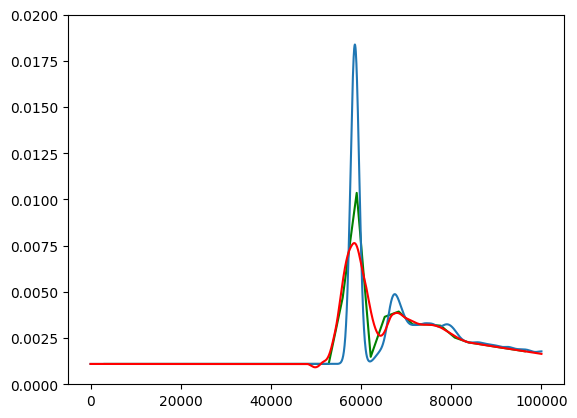

In [76]:
ax = plt.gca()
ax.set_ylim([0, 0.02])
lowess_model = lowess.Lowess()
lowess_model.fit(bd1, tr1, frac=0.1, robust_iters=0)
x = np.arange(0, 100000)
pred_lowess_vals = lowess_model.predict(x)
plt.plot(bd1, tr1, 'g')
plt.plot(x, transients[set_num, :])
plt.plot(x, pred_lowess_vals, 'r')

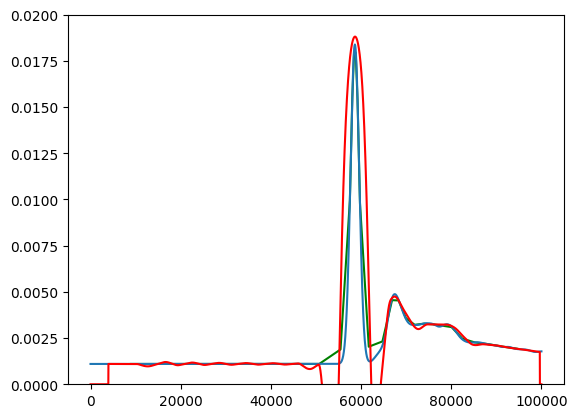

In [80]:
# Generate x-values
diffs = np.diff(bounds[set_num, :])
b_set = bounds[set_num, :][:-1] + (diffs/2)

# Generate y-values
t_set = []
for i in range(len(b_set)):
    cur_diff = (diffs[i] / diffs[0])
    t_set.append(0.0011 / cur_diff)
t_set = np.array(t_set)

ax = plt.gca()
ax.set_ylim([0, 0.02])
lowess_model = lowess.Lowess()
lowess_model.fit(b_set, t_set, frac=0.1, robust_iters=0)
x = np.arange(0, 100000)
pred_lowess_vals = lowess_model.predict(x)
plt.plot(b_set, t_set, 'g')
plt.plot(x, transients[set_num, :])
plt.plot(x, pred_lowess_vals, 'r')